***
# HIGH RESOLUTION SCHEMES
***

## NORMALIZED VARIABLE FORMULATION
***

* Normalized variable formulation is a framework for developing high resolution schemes from high order schemes. As the name suggests, this framework is based on a normalized value of an advected property, which is defined below:

    $$\tilde{\phi} = \frac{\phi - \phi_U}{\phi_D - \phi_U}$$

* For high order schemes, the cell face value of the advected property depends on upwind(C), downwind(D) and far upwind(U) values:

    $$\phi_f = f\left(\phi_C, \phi_D, \phi_U\right)$$

* In the normalized variable formulation framework, the normalized cell face value of the advected property ($\tilde{\phi_f}$) is dependent on the normalized value of an advected property at the upwind node ($\tilde{\phi_C}$).
    
    $$\tilde{\phi_f} = f\left(\tilde{\phi_C}\right)$$
    
    $$\tilde{\phi_C} = \frac{\phi_C - \phi_U}{\phi_D - \phi_U}$$

* By definition, the normalized value of the advected property at the far upwind ($\tilde{\phi_U}$) and downwind nodes ($\tilde{\phi_D}$) is 0 and 1, respectively:

    $$\tilde{\phi_U} = 0$$
    
    $$\tilde{\phi_D} = 1$$

* The normalized value of the advected property at the upwind node is a good indicator of the smoothness of the field, where values between 0 and 1  imply a monotonic profile. Values less than 0 or greater than 1 represent an extremum at the upwind node. Values approximately equal to 0 or 1 represent a gradient jump.

    $$\text{Monotonic Profile: } 0 < \tilde{\phi_C} < 1$$
    
    $$\text{Extrema: } \tilde{\phi_C} < 0 \text{ or } \tilde{\phi_C} > 1$$
    
    $$\text{Gradient Jump: } \tilde{\phi_C} \approx 0 \text{ or } \tilde{\phi_C} \approx 1$$

* A normalized variable diagram (NVD), which is a plot of $\tilde{\phi_f}$ against $\tilde{\phi_C}$, is an important tool for developing and analyzing high resolution schemes. Most of the previous advection-diffusion schemes, including high order schemes, can be converted into the normalized variable framework.
    
    - Central difference:
    
        $$\phi_f = \frac{\phi_C + \phi_D}{2}$$
    
        $$\phi_f = \frac{1}{2}\phi_C + \frac{1}{2}\phi_D$$
    
        $$\phi_f - \phi_U = \frac{1}{2}\left(\phi_C - \phi_U\right) + \frac{1}{2}\left(\phi_D - \phi_U\right)$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{1}{2}\frac{\phi_C - \phi_U}{\phi_D - \phi_U} + \frac{1}{2}\frac{\phi_D - \phi_U}{\phi_D - \phi_U}$$
    
        $$\tilde{\phi_f} = \frac{1}{2}\tilde{\phi_C} + \frac{1}{2}$$
        
    - Upwind:
    
        $$\phi_f = \phi_C$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{\phi_C - \phi_U}{\phi_D - \phi_C}$$
    
        $$\tilde{\phi_f} = \tilde{\phi_C}$$

    - Downwind:
    
        $$\phi_f = \phi_D$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{\phi_D - \phi_U}{\phi_D - \phi_U}$$
    
        $$\tilde{\phi_f} = 1$$
        
    - Second order upwind:

        $$\phi_f = \frac{3}{2}\phi_C - \frac{1}{2}\phi_U$$
    
        $$\phi_f = \frac{3\phi_C - \phi_U}{2}$$
    
        $$\phi_f - \phi_U = \frac{3\phi_C - \phi_U}{2} - \phi_U$$
    
        $$\phi_f - \phi_U = \frac{3\phi_C - 3\phi_U}{2}$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{3}{2}\frac{\phi_C - \phi_U}{\phi_D - \phi_U}$$
    
        $$\tilde{\phi_f} = \frac{3}{2} \tilde{\phi_C}$$
        
    - FROMM:

        $$\phi_f = \phi_C + \frac{1}{4}\phi_D - \frac{1}{4}\phi_U$$
    
        $$\phi_f - \phi_U = \left(\phi_C - \phi_U\right) + \frac{1}{4}\left(\phi_D - \phi_U\right)$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{\phi_C - \phi_U}{\phi_D - \phi_U} + \frac{1}{4}\frac{\phi_D - \phi_U}{\phi_D - \phi_U}$$
    
        $$\tilde{\phi_f} = \tilde{\phi_C} + \frac{1}{4}$$
        
    - QUICK:
    
        $$\phi_f = \frac{3}{4}\phi_C + \frac{3}{8}\phi_D - \frac{1}{8}\phi_U$$
    
        $$\phi_f - \phi_U = \frac{3}{4}\phi_C + \frac{3}{8}\phi_D - \frac{1}{8}\phi_U - \phi_U$$
    
        $$\phi_f - \phi_U = \frac{3}{4}\left(\phi_C - \phi_U\right) + \frac{3}{8} \phi_D - \frac{\phi_U + 2\phi_U}{8}$$
    
        $$\phi_f - \phi_U = \frac{3}{4}\left(\phi_C - \phi_U\right) + \frac{3}{8}\left(\phi_D - \phi_U\right)$$
    
        $$\frac{\phi_f - \phi_U}{\phi_D - \phi_U} = \frac{3}{4}\frac{\phi_C - \phi_U}{\phi_D - \phi_U} + \frac{3}{8}\frac{\phi_D - \phi_U}{\phi_D - \phi_U}$$
    
        $$\tilde{\phi_f} = \frac{3}{4}\tilde{\phi_C} + \frac{3}{8}$$
    
* From above derivations, the normalized variable formulation of higher order schemes takes the following linear form:

    $$\tilde{\phi_f} = l\tilde{\phi_C} + k$$

In [1]:
from numpy import linspace, ones, zeros, minimum
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['legend.frameon']=False
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['font.size'] = 14

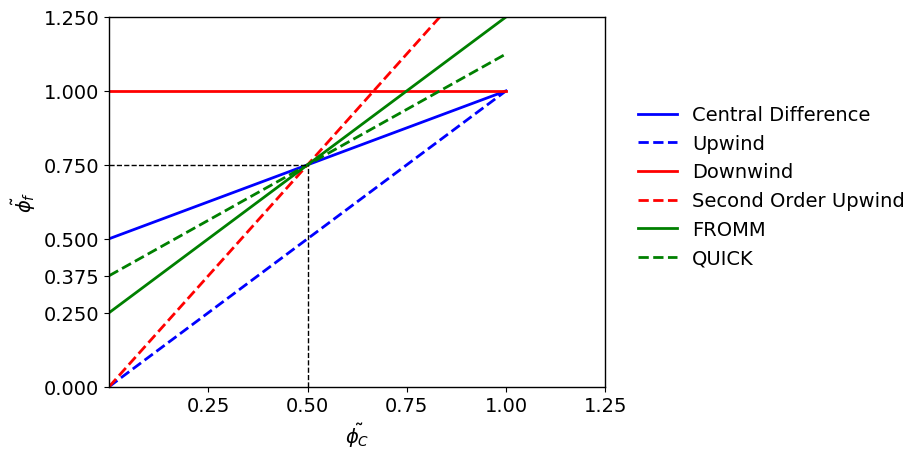

In [2]:
# normalized upwind values of phi
phic = linspace(0,1,2)

# central difference
phif_cd = 1.0/2.0*phic + 1.0/2.0

# upwind
phif_upwind = phic

# downwind
phif_downwind = ones(2)

# second order upwind
phif_sou = 1.5*phic

# FROMM
phif_fromm = phic + 1.0/4.0

# QUICK
phif_quick = 3.0/4.0*phic + 3.0/8.0

# construct NVD
plt.plot(phic, phif_cd, 'b-', label=r'Central Difference')
plt.plot(phic, phif_upwind, 'b--', label=r'Upwind')
plt.plot(phic, phif_downwind, 'r-', label=r'Downwind')
plt.plot(phic, phif_sou, 'r--', label=r'Second Order Upwind')
plt.plot(phic, phif_fromm, 'g-', label=r'FROMM')
plt.plot(phic, phif_quick, 'g--', label=r'QUICK')
plt.hlines(y=0.75, xmin=0, xmax=0.5, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=0.5, ymin=0, ymax=0.75, linestyle='dashed', color='black', linewidth=1)
plt.xlabel(r'$\tilde{\phi_C}$')
plt.ylabel(r'$\tilde{\phi_f}$')
plt.xticks([0.25, 0.50, 0.75, 1.0, 1.25])
plt.yticks([0,0.25,0.375,0.5,0.75,1,1.25])
plt.xlim([0,1.25])
plt.ylim([0,1.25])
plt.legend(loc=[1.05,0.3])
plt.show()

* From the above plot, a scheme which is at least second order accurate passes through the point (0.5, 0.75). In fact, this is a requirement for any new scheme to be at least second order accurate on a uniform grid. If the new scheme also has a slope of 0.75 (e.g., QUICK scheme) at the intersection point, then it is third order accurate. Any scheme whose plot is closer to the upwind plot is likely to be diffusive while a scheme whose plot lies closer to the downwind plot is likely to be anti-diffusive.

* While the upwind scheme is bounded, it is diffusive due to its first order accuracy. High order upwind-biased schemes were developed to address this problem, but introduced new challenges where they exhibit solution under/overshoots and oscillations when they encounter steep gradients of an advected property. These new challenges can result in unphysical values of an advected property. High resolution schemes attempt to smooth out the under/overshoots and oscillations.

* Godunov and Ryabenki showed that any linear scheme that is a monotone can at most be first order accurate, implying that all linear high order schemes cannot be monotonicity preserving or bounded. This explains why high order schemes tend to produce under/overshoots and oscillations near steep gradients. There are two approaches that are often used to develop bounded/non-oscillatory high order schemes:
    
    (i) switch between a high order scheme and a bounded lower order scheme (e.g., upwind scheme), with the switch being activated when a certain criterion is met. One such criterion is the convection boundedness criterion
    
    (ii) add a limited anti-diffusive flux to a first order upwind scheme in a manner that resolves steep gradients without introducing oscillations. In the Total Variation Diminishing (TVD) framework, this involves multiplying the anti-diffusive flux with a flux limiter, then adding the result to the diffusive flux of the first order upwind scheme.
    
### CONVECTION BOUNDEDNESS CRITERION
***

* Gaskell and Lau's criterion for convection boundedness requires the functional relationship to be continuous and meet the following conditions:
    
    - montonic range ($0 < \tilde{\phi_C} < 1$): 
        
        - a lower bound of $f(\tilde{\phi_C}) = \phi_C$ 
        
        - an upper bound of $f(\tilde{\phi_C}) = 1$
    
    - Extrema ($\tilde{\phi_C} < 0, \tilde{\phi_C} > 1$): 
        
        $$f(\tilde{\phi_C}) = \tilde{\phi_C}$$
    
    - Gradient jump: 
    
        $$f(\tilde{\phi_C}) = \begin{cases}0 \qquad \tilde{\phi_C} = 0\\ 1 \qquad \tilde{\phi_C} = 1 \end{cases}$$ 
    
* To develop a new high resolution scheme using the NVD, in the monotonic range ($0 < \tilde{\phi_C} < 1$), the profile should pass through the points (0,0) and (1,1) while remaining in the region (shaded in the next figure) bounded by the upwind and downwind schemes. In the non-monotonic range ($\tilde{\phi_C} < 0$ and $\tilde{\phi_C} > 1$) the profile needs to follow the upwind scheme.

* For better convergence, a new high resolution scheme should avoid hard angles at profile connection points as well as at its vertical and horizontal profiles.

* Some of the numerical schemes constructed this way include:
    
    1. MINMOD
        
        $$\tilde{\phi_f} = \begin{cases} \frac{3}{2}\tilde{\phi_C} \qquad \qquad 0 \leq \tilde{\phi_C} \leq \frac{1}{2}\\ \frac{1}{2}\tilde{\phi_C} + \frac{1}{2} \qquad \frac{1}{2} \leq \tilde{\phi_C} \leq 1 \\ \tilde{\phi_C} \qquad \qquad \text{elsewhere}\end{cases}$$
        
    2. SMART
    
        $$\tilde{\phi_f} = \begin{cases} \frac{3}{4}\tilde{\phi_C} + \frac{3}{8} \qquad 0 \leq \tilde{\phi_C} \leq \frac{5}{6}\\ 1 \qquad \qquad \frac{5}{6} \leq \tilde{\phi_C} \leq 1 \\ \tilde{\phi_C} \qquad \qquad \text{elsewhere}\end{cases}$$
    
    3. MUSCL
        
        $$\tilde{\phi_f} = \begin{cases} 2\tilde{\phi_C} \qquad \quad 0 \leq \tilde{\phi_C} \leq \frac{1}{4}\\ \tilde{\phi_C} + \frac{1}{4} \qquad \frac{1}{4} \leq \tilde{\phi_C} \leq \frac{3}{4}\\ 1 \qquad \qquad \frac{3}{4} \leq \tilde{\phi_C} \leq 1 \\ \tilde{\phi_C} \qquad \qquad \text{elsewhere}\end{cases}$$
        
    4. SUPERBEE
    
        $$\tilde{\phi_f} = \begin{cases} \frac{1}{2}\tilde{\phi_C} + \frac{1}{2} \qquad 0 \leq \tilde{\phi_C} \leq \frac{1}{2}\\ \frac{3}{2}\tilde{\phi_C} \qquad \qquad \frac{1}{2} \leq \tilde{\phi_C} \leq \frac{2}{3}\\ 1 \qquad \qquad \frac{2}{3} \leq \tilde{\phi_C} \leq 1 \\ \tilde{\phi_C} \qquad \qquad \text{elsewhere}\end{cases}$$
        
* The construction of MUSCL is illustrated on an NVD below.

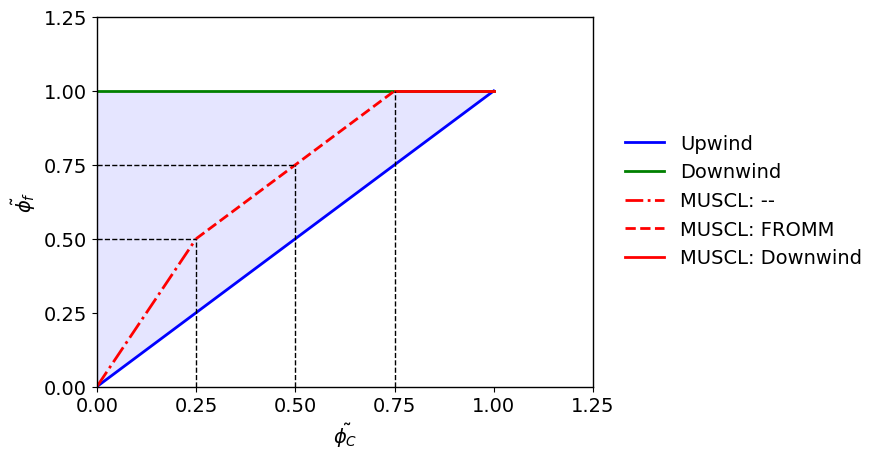

In [3]:
# muscl 1 - line through origin with slope of 2
x1 = linspace(0, 0.25, 10)
muscl1 = 2*x1 

# muscl 2 - fromm
x2 = linspace(0.25, 0.75, 10)
muscl2 = x2 + 0.25

# muscl 3 - downwind
x3 = linspace(0.75, 1.0, 10)
muscl3 = ones(10)

plt.plot(phic, phif_upwind, 'b-', label='Upwind')
plt.plot(phic, phif_downwind, 'g-', label='Downwind')
plt.fill_between(phic, phif_upwind, phif_downwind, color='blue', alpha=0.1)
plt.plot(x1, muscl1, 'r-.', label=r'MUSCL: --')
plt.plot(x2, muscl2, 'r--', label=r'MUSCL: FROMM')
plt.plot(x3, muscl3, 'r-', label=r'MUSCL: Downwind')
plt.hlines(y=0.75, xmin=0, xmax=0.5, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=0.5, ymin=0, ymax=0.75, linestyle='dashed', color='black', linewidth=1)
plt.hlines(y=0.5, xmin=0, xmax=0.25, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=0.25, ymin=0, ymax=0.5, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=0.75, ymin=0, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.xlabel(r'$\tilde{\phi_C}$')
plt.ylabel(r'$\tilde{\phi_f}$')
plt.legend()
plt.xticks([0, 0.25, 0.50, 0.75, 1.0, 1.25])
plt.yticks([0, 0.25, 0.50, 0.75, 1.0, 1.25])
plt.xlim([0,1.25])
plt.ylim([0,1.25])
plt.legend(loc=[1.05,0.3])
plt.show()

## TOTAL VARIATION DIMINISHING FRAMEWORK
***

* In contrast to the normalized variable framework, this framework is based on total variation, which is defined as follows

    $$\text{TV} = \sum_i  |\phi_{i+1} - \phi_i|$$
    
* For a numerical scheme to be total variation diminishing, TV must be non-increasing with time.

    $$\text{TV}\left(\phi^{t+\Delta t}\right) \leq \text{TV}\left(\phi^t\right)$$
    
* In constructing a TVD scheme, one of the basic guiding principles is to obtain a numerical scheme that possesses the stability and boundedness of the first order upwind scheme and the accuracy of second order central difference scheme. Starting from the central difference scheme, the cell face value is given by:
    
    $$\phi_f = \frac{1}{2}\left(\phi_D + \phi_C\right)$$
    
* The above cell face value can be re-arranged into the cell face value of the first order upwind scheme ($\phi_C$) and an anti-diffusive flux, $\frac{1}{2}\left(\phi_D - \phi_C\right)$:
    
    $$\phi_f = \phi_C + \frac{1}{2}\left(\phi_D - \phi_C\right)$$
    
* The anti-diffusive flux is what makes the central difference scheme more accurate than the upwind scheme. On the other hand, the truncation error of the upwind scheme, which leads to numerical diffusion, is what damps out unphysical oscillations. As highlighted earlier, the goal is to add a fraction of the anti-diffusive flux to the upwind scheme in a way that ensures the second order accuracy of the central difference scheme without losing the ability of the upwind scheme to damp out unphysical oscillations. One way to achieve this is to multiply the anti-diffusive flux by a flux limiter $\psi\left(r_f\right)$, which must be non-negative to preserve the sign of anti-diffusive flux.

    $$\phi_f = \phi_C + \frac{1}{2}\psi(r)\left[\phi_D - \phi_C\right]$$
    
    $$r = \frac{\phi_C - \phi_U}{\phi_D - \phi_C}$$

* A numerical scheme is total variation diminishing if it meets the following conditions:

    * 0 < r < 1
    
        $$\psi\left(r\right) \leq 2r$$
    
    * r $\geq$ 1
        
        $$\psi\left(r\right) \leq 2$$
        
* For a TVD scheme to be second order accurate, it must meet above conditions, pass through the point (1,1) and be bounded by the second order upwind and central difference schemes. The region where a TVD scheme is second order accurate is shaded light red in the next figure. The area shaded light blue is the general TVD region, which contains schemes of various accuracies.

* Some of the smooth limiter functions that are second order accurate and total variation dimininshing include Van Leer and Van Albada, both of which are named after those who developed them.
    
    1. Van Leer
        
        $$\psi\left(r\right) = \frac{r + |r|}{1+r}$$
        
    2. Van Albada
        
        $$\psi\left(r\right) = \frac{r + r^2}{1+r^2}$$
        
* The advection schemes we saw earlier can be cast into TVD form as shown below:
    
    - Central Difference
        
        $$\psi\left(r\right) = 1$$
        
    - Upwind
        
        $$\psi\left(r\right) = 0$$
    
    - Downwind
        
        $$\phi_f = \phi_D$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right)$$
        
        $$\phi_C + \frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right) = \phi_D$$
        
        $$\frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right) = \phi_D - \phi_C$$
        
        $$\psi\left(r\right) = 2 \frac{\phi_D - \phi_C}{\phi_D - \phi_C}$$
        
        $$\psi\left(r\right) = 2$$
        
    - Second Order Upwind
        
        $$\phi_f = \frac{3}{2}\phi_C - \frac{1}{2}\phi_U$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\phi_C - \frac{1}{2}\phi_U$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\left(\phi_C - \phi_U\right)$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right)$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \left(\phi_C - \phi_U\right)$$
        
        $$\psi\left(r\right) = \frac{\phi_C - \phi_U}{\phi_D - \phi_C}$$
        
        $$\psi\left(r\right) = r$$
    
    - FROMM
        
        $$\phi_f = \phi_C + \frac{1}{4}\left(\phi_D - \phi_U\right)$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right)$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{1}{2}\left(\phi_D - \phi_U\right)$$
        
        $$\psi\left(r\right) = \frac{1}{2}\left(\frac{\phi_D - \phi_U}{\phi_D - \phi_C}\right)$$
        
        $$\psi\left(r\right) = \frac{1}{2}\left(\frac{\phi_D - \phi_U + \phi_C - \phi_C}{\phi_D - \phi_C}\right)$$
        
        $$\psi\left(r\right) = \frac{1}{2}\left(\frac{\phi_D - \phi_C}{\phi_D - \phi_C} + \frac{\phi_C - \phi_U}{\phi_D - \phi_C}\right)$$
        
        $$\psi\left(r\right) = \frac{1}{2}\left(1 + r\right)$$
        
    - QUICK
        
        $$\phi_f = \frac{3}{4}\phi_C + \frac{3}{8}\phi_D - \frac{1}{8} \phi_U$$
        
        $$\phi_f = \phi_C + \left[\frac{3}{8}\phi_D - \frac{1}{4}\phi_C - \frac{1}{8}\phi_U\right]$$
        
        $$\phi_f = \phi_C + \frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right)$$
        
        $$\frac{1}{2}\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{3}{8}\phi_D - \frac{1}{4}\phi_C - \frac{1}{8}\phi_U$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{3}{4}\phi_D - \frac{1}{2}\phi_C - \frac{1}{4}\phi_U$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{1}{4}\left[3\phi_D - 2\phi_C - \phi_U\right]$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{1}{4}\left[3\phi_D - 2\phi_C - \phi_C + \phi_C - \phi_U\right]$$
        
        $$\psi\left(r\right)\left(\phi_D - \phi_C\right) = \frac{1}{4}\left[3\left(\phi_D - \phi_C\right) + \left(\phi_C - \phi_U\right)\right]$$
        
        $$\psi\left(r\right) = \frac{1}{4}\left[3\frac{\phi_D - \phi_C}{\phi_D - \phi_C} + \frac{\phi_C - \phi_U}{\phi_D - \phi_C}\right]$$
        
        $$\psi\left(r\right) = \frac{1}{4}\left(3 + r\right)$$
     
* A plot of $\psi$ against r is called Sweby's diagram. All the above schemes are shown on Sweby's diagram below. As mentioned, if a scheme lies in the regions shaded light blue and light red, then it is total variation diminishing. On the other hand, if a scheme passes through the region coloured light red, then it is both TVD and second order accurate.

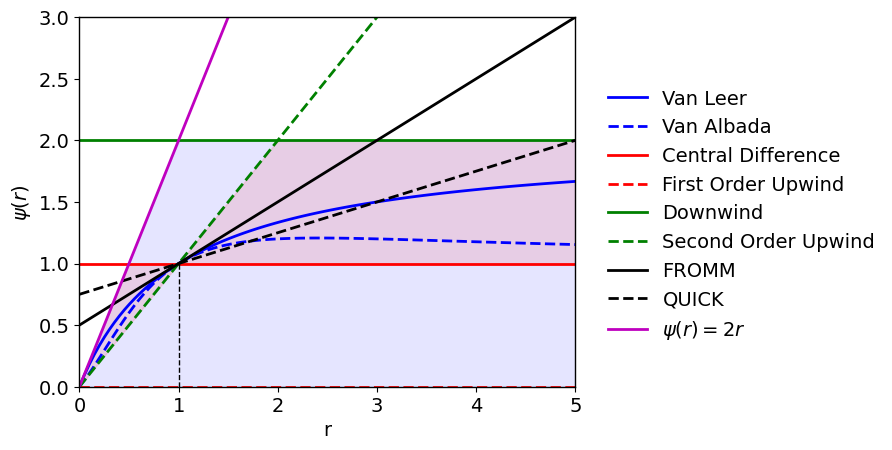

In [4]:
# range of r
r = linspace(0,5,100)

# van leer
psi_vanleer = (r + abs(r))/(1.0 + r)

# van albada
psi_vanalbada = (r + r**2)/(1.0 + r**2)

# central difference
psi_cd = ones(100)

# upwind
psi_upwind = zeros(100)

# downwind
psi_downwind = 2.0*ones(100)

# second order upwind
psi_sou = r

# FROMM
psi_fromm = 0.5*(1.0 + r)

# QUICK
psi_quick = 0.25*(3.0 + r)

# TVD upper limit in the range 0<r<1
psi_upper = 2*r

# TVD region
x1 = linspace(0,5,100)
y1 = zeros(100)
y2 = 2*ones(100)
y3 = 2*x1
y4 = minimum(y3,y2)

# second order TVD region
x2 = linspace(0,1,100)
y5 = 2.0*x2
y6 = x2
y7 = ones(100)
y8 = minimum(y7,y5)

x3 = linspace(1,5,100)
y9 = ones(100)
y10 = 2*ones(100)
y11 = x3
y12 = minimum(y11,y10)

plt.plot(r, psi_vanleer, 'b-', label='Van Leer')
plt.plot(r, psi_vanalbada, 'b--', label='Van Albada')
plt.plot(r, psi_cd, 'r-', label='Central Difference')
plt.plot(r, psi_upwind, 'r--', label='First Order Upwind')
plt.plot(r, psi_downwind, 'g-', label='Downwind')
plt.plot(r, psi_sou, 'g--', label='Second Order Upwind')
plt.plot(r, psi_fromm, 'k-', label='FROMM')
plt.plot(r, psi_quick, 'k--', label='QUICK')
plt.plot(r, psi_upper, 'm-', label=r'$\psi\left(r\right) = 2r$')
plt.vlines(x=1, ymin=0, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.fill_between(x1, y4, y1, color='blue', alpha=0.1)
plt.fill_between(x2, y8, y6, color='red', alpha=0.1)
plt.fill_between(x3, y12, y9, color='red', alpha=0.1)
plt.xlim([0,5])
plt.ylim([0,3])
plt.xlabel('r')
plt.ylabel(r'$\psi\left(r\right)$')
plt.legend(loc=[1.05,0.1])
plt.show()